# Unsupervised Learning - K-Means and Hierarchical Clustering

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Load the 2 datasets

In [2]:
df = pd.read_excel(r"Online Retail.xlsx")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df1 = pd.read_csv(r"Mall_Customers.csv")
df1.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Show the dataset shape (rows, columns) and column names with dtypes

In [5]:
# Data shapes
df.shape

(541909, 8)

In [6]:
df1.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Count unique values per column and list the top 10 most frequent values in a categorical field.

In [9]:
unique_count = df.nunique()
print(unique_count)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [10]:
unique_count1 = df1.nunique()
print(unique_count1)

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


In [11]:
# Top 10 most frequent values in categorical field
top10 = pd.DataFrame(df['Country'].value_counts().head(10))
print(top10)

                 count
Country               
United Kingdom  495478
Germany           9495
France            8557
EIRE              8196
Spain             2533
Netherlands       2371
Belgium           2069
Switzerland       2002
Portugal          1519
Australia         1259


In [12]:
top_10 = pd.DataFrame(df1['Genre'].value_counts().head(10))
print(top_10)

        count
Genre        
Female    112
Male       88


### Find missing values per column and report counts

In [13]:
missing_count = df.isnull().sum()
print(missing_count)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


The columns Description and CustomerID has missing values

In [14]:
missing__count = df1.isnull().sum()
print(missing__count)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Show summary statistics for numeric columns: mean, median, std, min, max, quartiles.

In [15]:
df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [16]:
df1.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group.

In [17]:
# define labels and bins
bins = [18, 40, 60, 100]
labels = ['Young', 'Adult', 'Senior']
df1['AgeGroup'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)
df1.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,Young
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,Young
4,5,Female,31,17,40,Young


In [52]:
age_group_counts = df1['AgeGroup'].sort_values()
print(age_group_counts)

0       Young
123     Young
124     Young
125     Young
129     Young
        ...  
109    Senior
116    Senior
57     Senior
10     Senior
73     Senior
Name: AgeGroup, Length: 200, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Senior']


In [19]:
age_group = pd.DataFrame(df1.groupby('AgeGroup')['Age'].mean())
print(age_group)

                Age
AgeGroup           
Young     28.801724
Adult     48.687500
Senior    65.650000


C:\Users\USER\AppData\Local\Temp\ipykernel_6664\1895048741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = pd.DataFrame(df1.groupby('AgeGroup')['Age'].mean())


### Detect and count any unrealistic values (e.g., negative or zero values).

In [20]:
# Detect unrealistic values in the dataset
unrealistic_values = (df.select_dtypes(include=['number'])<=0).sum()
print(unrealistic_values)

Quantity      10624
UnitPrice      2517
CustomerID        0
dtype: int64


In [21]:
(df1.select_dtypes(include=['number'])<=0).sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Find how many unique customers exist and which group/category is most common.

In [22]:
unique_customers = df['CustomerID'].nunique()
print(unique_customers)

4372


In [23]:
unique_custom = df1['CustomerID'].nunique()
print(unique_custom)

200


In [24]:
common_customers = df['Country'].value_counts().idxmax()
print(common_customers)

United Kingdom


In [25]:
common_count = df['Country'].value_counts().max()
print(common_count)

495478


In [26]:
common_customers = df1['Genre'].value_counts().idxmax()
print(common_customers)

Female


In [27]:
common_count = df1['Genre'].value_counts().max()
print(common_count)

112


In [28]:
common_customers=df1['AgeGroup'].value_counts().idxmax()
print(common_customers)

Young


In [29]:
common_count = df1['AgeGroup'].value_counts().max()
print(common_count)

116


## Data Cleaning and Filtering

### Remove rows with missing values in key columns

In [30]:
# Drop rows with missing values in the online retail data
print(f"Shape of the data before dropping missing values: {df.shape}")

Shape of the data before dropping missing values: (541909, 8)


In [31]:
df = df.dropna()

In [32]:
df.shape

(406829, 8)

### Pros of Dropping Rows with Missing Values

- Simplifies analysis – you avoid dealing with imputation or bias introduced by filling missing values.

- Keeps data “real” – ensures only complete and accurate records are used, which may improve model reliability.

### Cons of Dropping Rows with Missing Values

- Data loss – you may lose a significant portion of your dataset, reducing sample size and statistical power.

- Bias risk – if missing values are not random (e.g., certain groups are more affected), dropping rows can distort the dataset.

### Drop Duplicate rows and report how many were dropped

In [33]:
df.duplicated().sum()

np.int64(5225)

In [34]:
# Drop duplicates
df = df.drop_duplicates()

5225 rows were dropped as a result of them being duplicates

In [35]:
df1.duplicated().sum()

np.int64(0)

### Filter out records where age<18

In [36]:
df1 = df1[df1['Age'] >= 18]
df1.shape

(200, 6)

### Create a new categorical column from numeric data using conditional statements

In [37]:
def group_customer(age):
    if age < 18:
        return 'Young'
    elif 18 <= age < 40:
        return 'Adult'
    elif 40 <= age < 75:
        return 'Senior'
    else:
        return 'Old'
df1['Group'] = df1['Age'].apply(group_customer)
df1.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,Group
0,1,Male,19,15,39,Young,Adult
1,2,Male,21,15,81,Young,Adult
2,3,Female,20,16,6,Young,Adult
3,4,Female,23,16,77,Young,Adult
4,5,Female,31,17,40,Young,Adult


### Replace missing values in a numeric column with the mean.


In [38]:
# An example code
median_value = df['Quantity'].median()
print(median_value)

5.0


In [39]:
df = df['Quantity'].fillna(median_value, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6664\2795125939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df = df['Quantity'].fillna(median_value, inplace=True)


### Bucket customers into categories based on quantiles (e.g., spending level)

In [40]:
df1['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [41]:
def score_group(spending_score):
    if spending_score <20:
        return 'Low'
    elif 20 <= spending_score < 50:
        return 'Moderate'
    elif 50<= spending_score <100:
        return 'High'
    else:
        return 'Extremely high'
    
df1['Group_Spending_Score'] = df1['Spending Score (1-100)'].apply(score_group)
df1.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,Group,Group_Spending_Score
0,1,Male,19,15,39,Young,Adult,Moderate
1,2,Male,21,15,81,Young,Adult,High
2,3,Female,20,16,6,Young,Adult,Low
3,4,Female,23,16,77,Young,Adult,High
4,5,Female,31,17,40,Young,Adult,Moderate


### Explain and apply feature scaling to numeric features

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
num_cols = df1.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(num_cols), columns=num_cols.columns)
scaled_data.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980


## Aggregation and Feature Engineering

#### Compute average income by gender using groupby.


In [44]:
income_gender = pd.DataFrame(df1.groupby('Genre')['Annual Income (k$)'].mean())
print(income_gender)


        Annual Income (k$)
Genre                     
Female           59.250000
Male             62.227273


### Calculate max, min, and mean for numeric columns per group

In [45]:
stacs = df1.select_dtypes(include=['number']).describe().T
print(stacs)

                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  


### Create a new ratio feature (e.g., income-to-age)

In [46]:
df1['income_to_age'] = df1['Annual Income (k$)'] / df1['Age']
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,Group,Group_Spending_Score,income_to_age
0,1,Male,19,15,39,Young,Adult,Moderate,0.789474
1,2,Male,21,15,81,Young,Adult,High,0.714286
2,3,Female,20,16,6,Young,Adult,Low,0.800000
3,4,Female,23,16,77,Young,Adult,High,0.695652
4,5,Female,31,17,40,Young,Adult,Moderate,0.548387


### Flag “High value” customers based on income and spending greater than average.

In [47]:
avg_income = df1['Annual Income (k$)'].mean()
avg_spending = df1['Spending Score (1-100)'].mean()

In [ ]:
df1['HighValueCustomer'] = ((df1['Annual Income (k$)'] > avg_income) & (df1['Spending Score (1-100)'] > avg_spending))
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,Group,Group_Spending_Score,income_to_age,HighValueCustomer
0,1,Male,19,15,39,Young,Adult,Moderate,0.789474,False
1,2,Male,21,15,81,Young,Adult,High,0.714286,False
2,3,Female,20,16,6,Young,Adult,Low,0.800000,False
3,4,Female,23,16,77,Young,Adult,High,0.695652,False
4,5,Female,31,17,40,Young,Adult,Moderate,0.548387,False


### Compute correlation between numeric features.

In [49]:
correlation_matrix = num_cols.corr()
correlation_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### Determine which gender has a higher average spending score.

In [50]:
spending_gender = pd.DataFrame(df1.groupby('Genre')['Spending Score (1-100)'].mean())
print(spending_gender)

        Spending Score (1-100)
Genre                         
Female               51.526786
Male                 48.511364


### Create a pivot table by age group and gender for average spending.

In [53]:
age_gender_spend = df1.groupby(['Genre', 'Group'])['Spending Score (1-100)'].mean()
print(age_gender_spend)

Genre   Group 
Female  Adult     61.500000
        Senior    37.217391
Male    Adult     57.800000
        Senior    36.289474
Name: Spending Score (1-100), dtype: float64


## Visualizations and Group exploration

### Plot histogram of age distribution

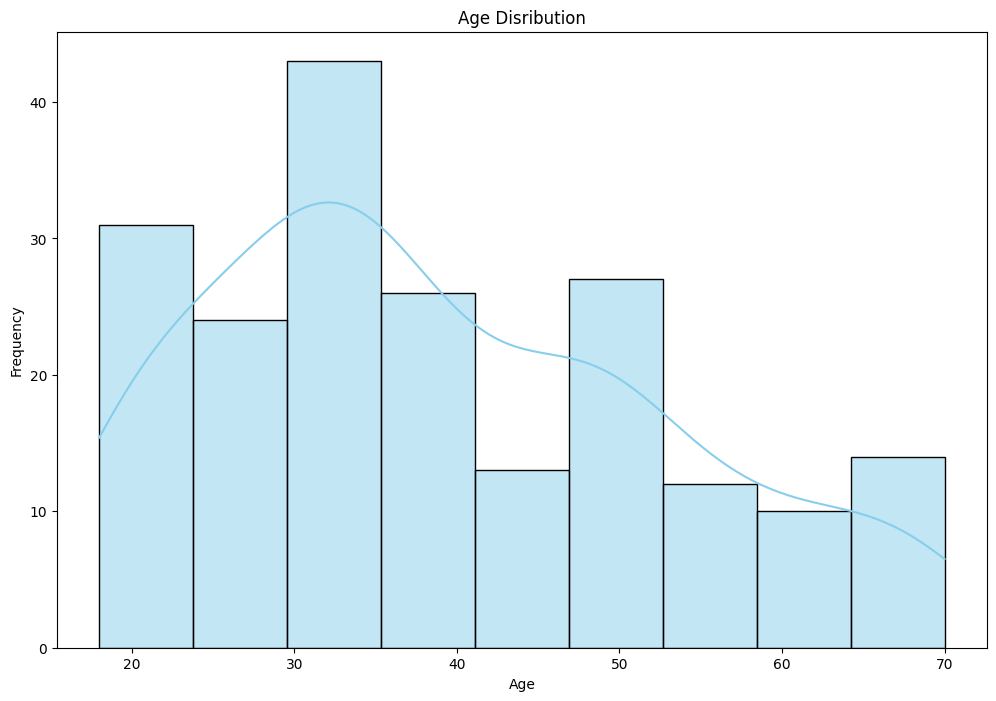

In [54]:
plt.figure(figsize=(12,8))
sns.histplot(x=df1['Age'], kde=True, color='skyblue')
plt.title('Age Disribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Create a bar chart of average spending score by gender.


In [56]:
avg_spend_gender = pd.DataFrame(df1.groupby('Genre')['Spending Score (1-100)'].mean())
print(avg_spend_gender)

        Spending Score (1-100)
Genre                         
Female               51.526786
Male                 48.511364


<Figure size 1200x800 with 0 Axes>

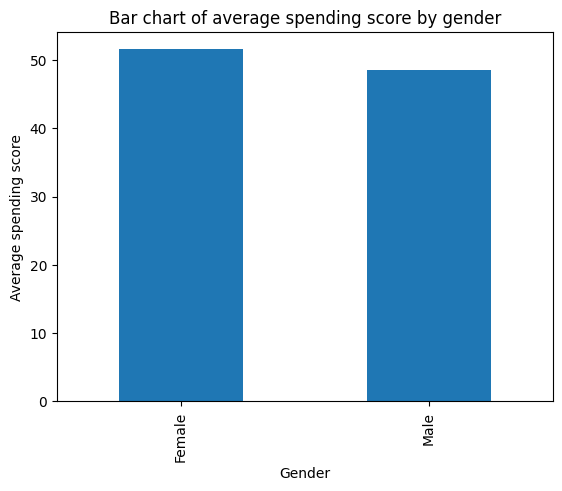

In [ ]:
plt.figure(figsize=(12,8))
avg_spend_gender.plot(kind='bar', legend=False)
plt.title('Bar chart of average spending score by gender')
plt.xlabel('Gender')
plt.ylabel('Average spending score')
plt.show()

### Create a scatter plot of Annual Income vs Spending Score.


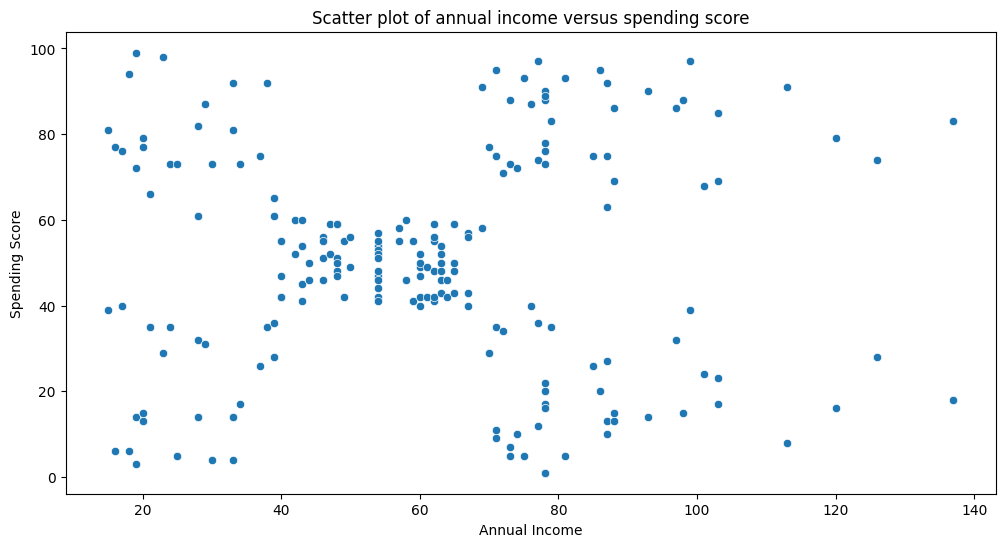

In [59]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Annual Income (k$)'], y=df1['Spending Score (1-100)'])
plt.title('Scatter plot of annual income versus spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Create a boxplot of spending score grouped by age bins.

C:\Users\USER\AppData\Local\Temp\ipykernel_6664\3929868272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['AgeGroup'], y=df1['Spending Score (1-100)'], palette='viridis')


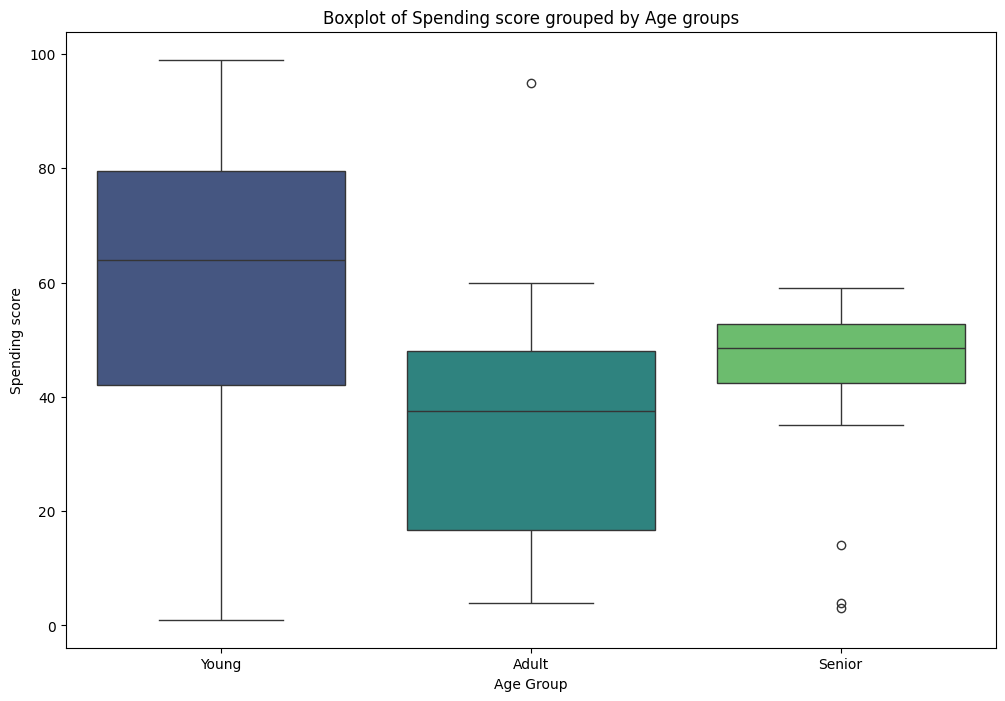

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df1['AgeGroup'], y=df1['Spending Score (1-100)'], palette='viridis')
plt.title('Boxplot of Spending score grouped by Age groups')
plt.xlabel('Age Group')
plt.ylabel('Spending score')
plt.show()

### Create a heatmap of correlations between numeric features.

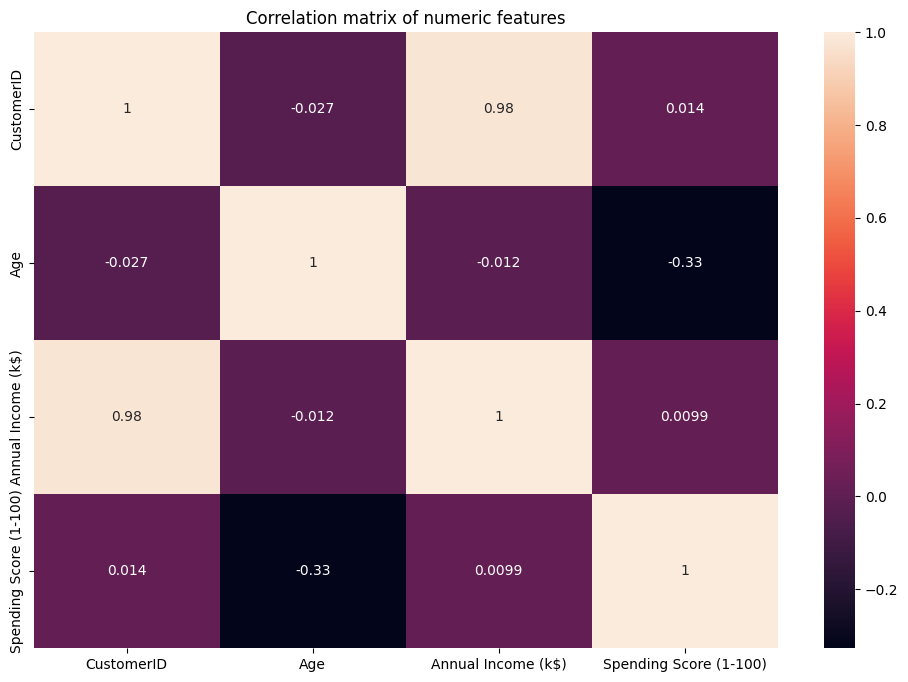

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix of numeric features')
plt.show()

## Dimensionality reduction (PCA & t-SNE)

### Run PCA on standardized income and spending features and plot explained variance.


In [ ]:
X = df1[['Spending Score (1-100)', 'Annual Income (k$)']]

In [64]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Explained variance ratio vs. Number of components')

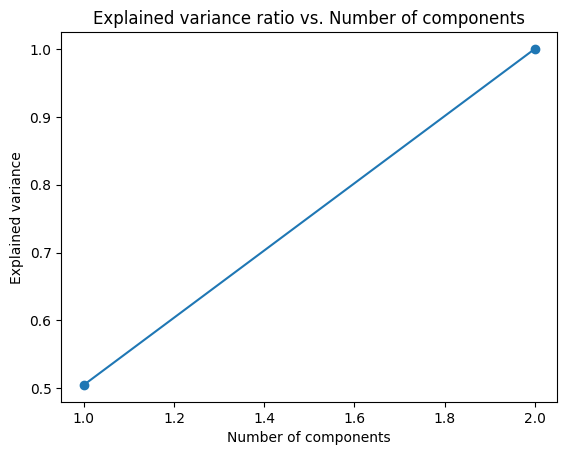

In [65]:
pca = PCA().fit(X_scaled)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance ratio vs. Number of components')

### Plot 2D PCA components scatter colored by a category (e.g., Gender).


In [69]:
# Separate features and labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Genre_encoded'] = le.fit_transform(df1['Genre'])

In [70]:
y = df1['Genre_encoded']

In [71]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Genre_encoded'] = y.values

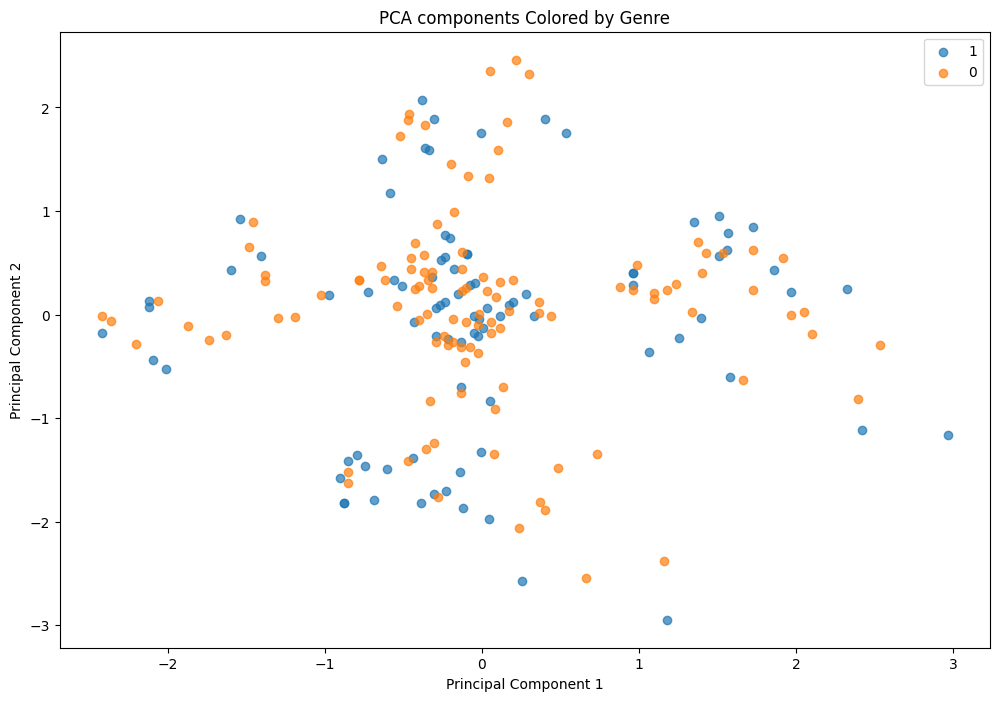

In [72]:
# Plot the PCA results colored by department
plt.figure(figsize=(12,8))
for genr in pca_df['Genre_encoded'].unique():
    subset = pca_df[pca_df['Genre_encoded'] == genr]
    plt.scatter(subset['PC1'], subset['PC2'], label=genr, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA components Colored by Genre')
plt.legend()
plt.show()

### Run t-SNE and plot the 2D embedding.


In [74]:
from sklearn.manifold import TSNE
# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

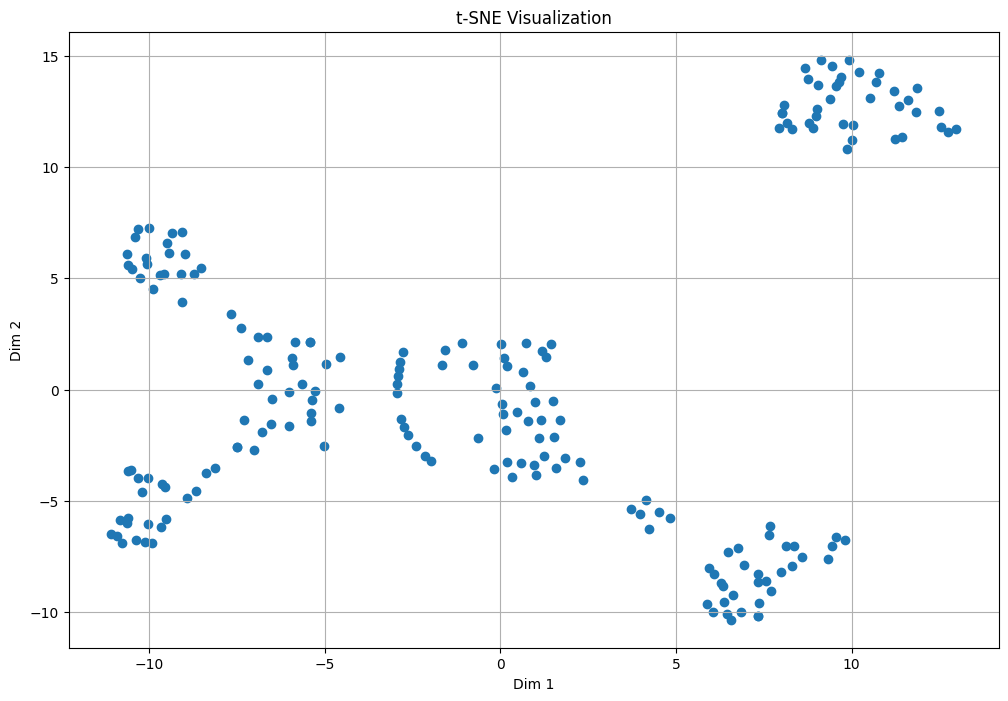

In [75]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()

### Compare PCA and t-SNE plots — which shows clearer clusters?

The SNE plot shows clearer clusters than its PCA counterpart

## Clustering & evaluation

### Run k-means for k=2…10 on standardized features and plot the elbow curve.


In [77]:
numerical_columns = df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'income_to_age']]
numerical_columns.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'income_to_age'], dtype='object')

In [78]:
# Standardize the numerical features
scaled_data = scaler.fit_transform(numerical_columns)

In [85]:
# Elbow method to find optimal K
inertias = []
silhouette_scores = []
k_range = range(2, 10)

In [86]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

Text(0.5, 1.0, 'Elbow Method - Inertia')

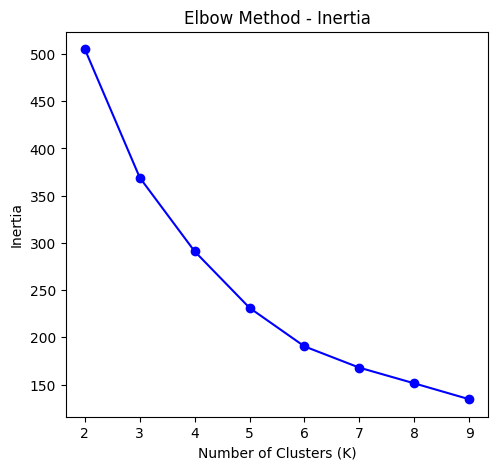

In [87]:
# Plot Inertia vs K (Elbow Method)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')

### Compute silhouette score for each k and identify the best k.


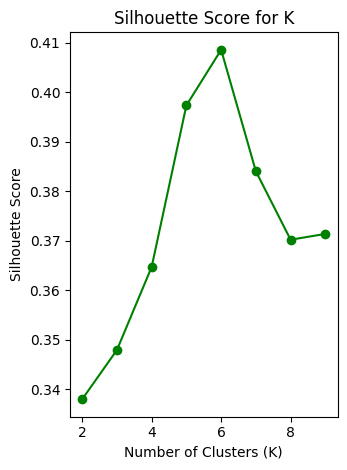

In [88]:
# Plot Silhouette Score vs K
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K')
plt.tight_layout()
plt.show()

The optimal number of clusters is 6

### Plot clusters for the chosen k using a scatter plot.

In [90]:
# Apply KMeans with Optimal K (based on elbow/silhouette)
optimal_k = 6  # You can change this based on the elbow/silhouette
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df1['Cluster'] = clusters

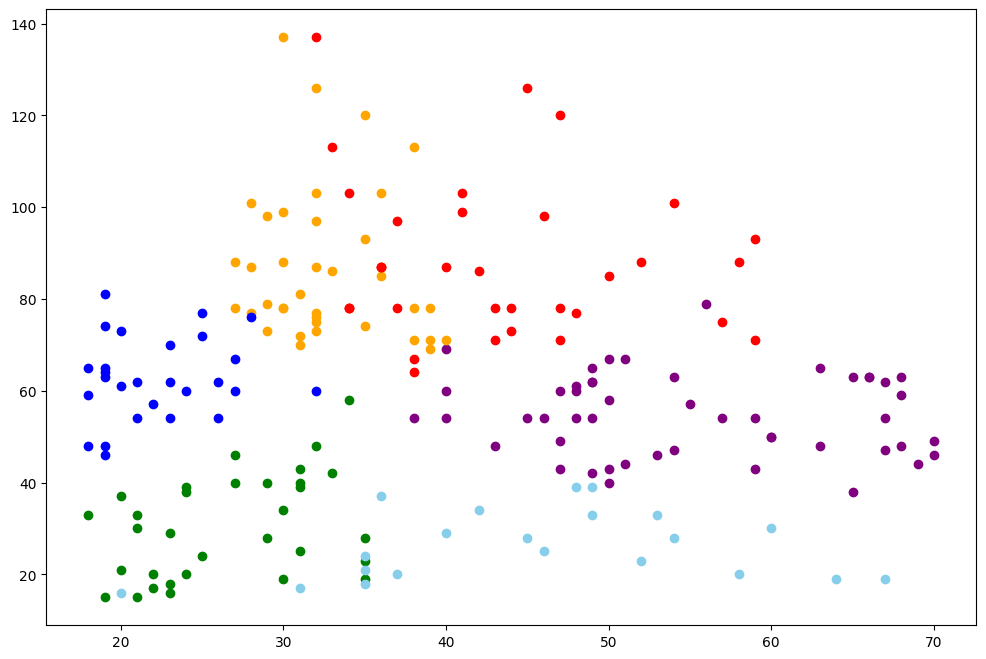

In [94]:
# Visualize Clusters
plt.figure(figsize=(12, 8))
colors = ['purple', 'orange', 'green', 'blue', 'red','skyblue']
for i in range(optimal_k):
    plt.scatter(df1['Age'][df1['Cluster'] == i],
                df1['Annual Income (k$)'][df1['Cluster'] == i],
                label=f'Cluster {i+1}',
                color=colors[i])

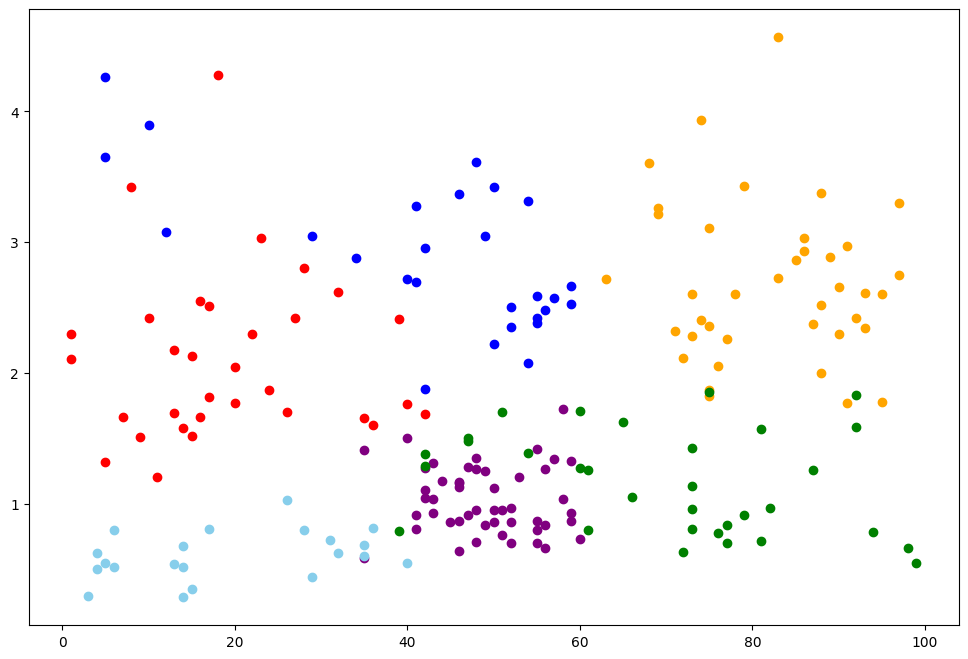

In [95]:
# Visualize Clusters
plt.figure(figsize=(12, 8))
colors = ['purple', 'orange', 'green', 'blue', 'red','skyblue']
for i in range(optimal_k):
    plt.scatter(df1['Spending Score (1-100)'][df1['Cluster'] == i],
                df1['income_to_age'][df1['Cluster'] == i],
                label=f'Cluster {i+1}',
                color=colors[i])

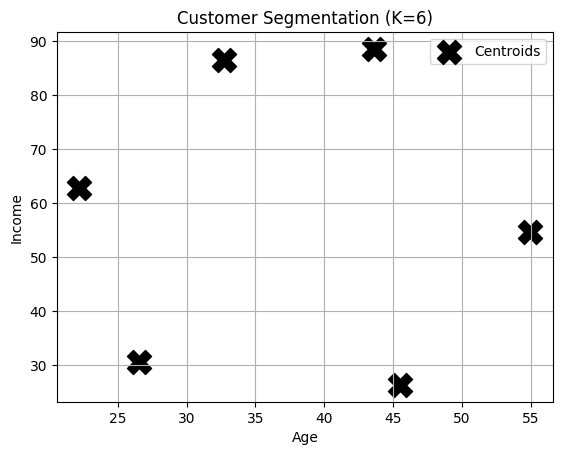

In [96]:
# Add cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label='Centroids', marker='X')

plt.xlabel("Age")
plt.ylabel("Income")
plt.title(f"Customer Segmentation (K={optimal_k})")
plt.legend()
plt.grid(True)
plt.show()

In [97]:
#  Evaluate Clustering Performance
print(f"Final Inertia (Total within-cluster distance): {kmeans.inertia_:.2f}")
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

#  Display Cluster Assignments
print("\nCluster Assignments:")
print(df1.sort_values(by='Cluster'))

Final Inertia (Total within-cluster distance): 190.37
Silhouette Score: 0.4086

Cluster Assignments:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
63          64  Female   54                  47                      59   
62          63  Female   67                  47                      52   
54          55  Female   50                  43                      45   
53          54    Male   59                  43                      60   
50          51  Female   49                  42                      52   
..         ...     ...  ...                 ...                     ...   
26          27  Female   45                  28                      32   
18          19    Male   52                  23                      29   
16          17  Female   35                  21                      35   
20          21    Male   35                  24                      35   
22          23  Female   46                  25                       5   

### Run hierarchical clustering and visualize a dendrogram.

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage

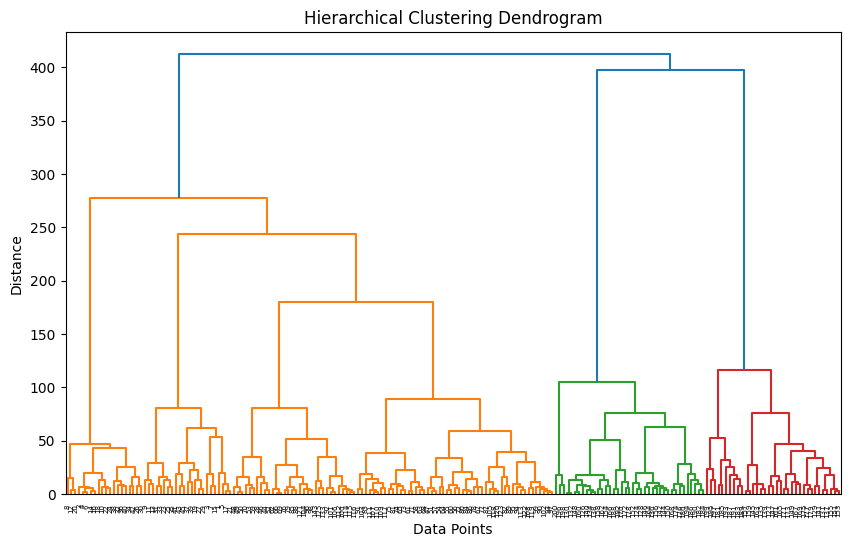

In [99]:
# Linkage matrix
linked = linkage(numerical_columns, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=range(1, len(numerical_columns)+1),
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Cut the dendrogram at k clusters and compare with k-means.


In [100]:
from sklearn.cluster import AgglomerativeClustering

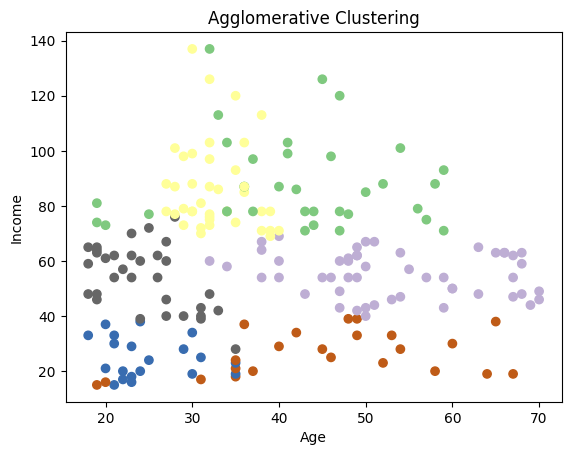

In [103]:
# Apply Agglomerative Clustering with 3 clusters
model = AgglomerativeClustering(n_clusters=6, linkage='ward')
df1['Cluster'] = model.fit_predict(numerical_columns)

# Visualize
plt.scatter(df1['Age'], df1['Annual Income (k$)'], c=df1['Cluster'], cmap='Accent')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Agglomerative Clustering')
plt.show()

### Evaluation

In [105]:
# from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import StandardScaler

# Standardize
# scaled_data = StandardScaler().fit_transform(data[['Age', 'Income']])

# Cluster
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(scaled_data)

# Score
score = silhouette_score(scaled_data, labels)
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.3231


### Profile each cluster: average age, income, spending score.


In [106]:
#import pandas as pd

cluster_profile = df1.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(2)

print(cluster_profile)


           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        41.69               88.23                   17.29
1        53.22               55.12                   49.47
2        32.69               86.54                   82.13
3        24.85               24.95                   81.00
4        45.22               26.30                   20.91
5        24.53               54.19                   50.25


### Check cluster sizes

In [107]:
# Count number of records per cluster
cluster_sizes = df1['Cluster'].value_counts().sort_index()

print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
Cluster
0    35
1    51
2    39
3    20
4    23
5    32
Name: count, dtype: int64


Clusters 3 and 4 have the lowest size, 20 and 23 respectively

In [108]:
# Try different random states
results = {}
for state in [0, 1, 42, 99]:
    kmeans = KMeans(n_clusters=6, random_state=state, n_init=10)
    df1[f'Cluster_state_{state}'] = kmeans.fit_predict(X)
    results[state] = df1[f'Cluster_state_{state}'].value_counts().to_dict()

# Show cluster assignments for each random state
for state, counts in results.items():
    print(f"\nCluster sizes with random_state={state}:")
    print(counts)


Cluster sizes with random_state=0:
{3: 81, 2: 35, 1: 28, 5: 23, 0: 22, 4: 11}

Cluster sizes with random_state=1:
{0: 81, 1: 35, 3: 29, 4: 23, 5: 22, 2: 10}

Cluster sizes with random_state=42:
{0: 81, 1: 35, 5: 29, 3: 23, 4: 22, 2: 10}

Cluster sizes with random_state=99:
{0: 81, 4: 35, 5: 28, 3: 23, 1: 22, 2: 11}


In [109]:
# Export dataset with cluster labels
df1.to_csv("clustered_customers.csv", index=False)